<img src="../images/fake-news-quotes-01-830x467.jpeg" width="800" height="70" />

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import bigrams
from nltk.stem import PorterStemmer

import re
import datetime


[nltk_data] Downloading package stopwords to /Users/kilo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Get data 
[data source](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset)

In [2]:
df_0 = pd.read_csv("../data/archive/Fake.csv")
df_1 = pd.read_csv("../data/archive/True.csv")

### 1. EDA

<img src="../images/Screenshot 2021-05-17 at 16.24.54.png
" width="300" height="50" />

In [3]:
df_0.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_1.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [5]:
# adding category 0 to fake news and category 1 to true news
df_0["category"] = 0
df_1["category"] = 1

In [6]:
# concatenating dataframes
df = pd.concat([df_0, df_1],axis=0)
df = df.reset_index()
df = df.drop(['index'], axis=1)
df

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [7]:
# saving dataframe as CSV
df.to_csv(f'../data/df_fakenews_merge.csv', index=False)

In [8]:
# quick overview of the new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [9]:
# Return the number of missing values in each column
df.isnull( ).sum( )

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [10]:
# Number of unique elements in "subjetc" column
df["subject"].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

In [11]:
# Statistical summary for numerical columns present in the dataset. 
# Not to much sense on this dataframe
df.describe()

,category
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
# getting number of dimensions as well as the size in each dimension
df.shape

(44898, 5)

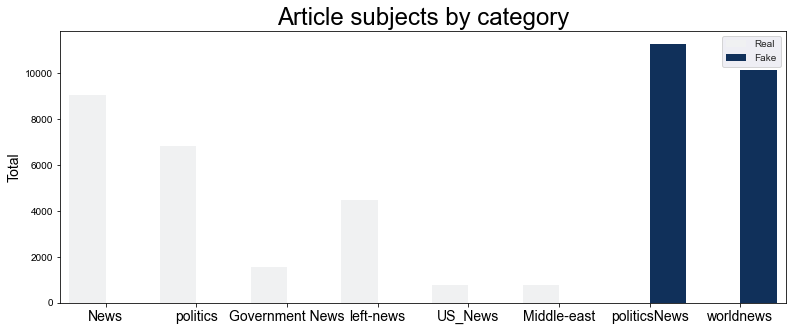

In [13]:
# Ploting a first overview of the data
plt.figure(figsize=(13,5))
sns.countplot(x='subject', data=df, hue='category', color='#042f66')

plt.title('Article subjects by category', fontsize=24)
plt.ylabel('Total', fontsize=14)
plt.xlabel("")
plt.xticks(fontsize=14)
sns.set_style("dark")
plt.legend(['Real', 'Fake'])
plt.show()

### 3. Data Cleaning

<img src="../images/data_cleaning.jpeg" width="300" height="50" />

In [14]:
# Detect missing values for an array-like object.
df.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [15]:
# removing a row that has a NaN or missing values in it.
df.dropna(inplace=True)

In [16]:
# analyzing duplicated values
df.duplicated().sum()

209

In [17]:
# drop duplicates
df = df.drop_duplicates()

In [18]:
# counting duplicated rows in "title" column
df["title"].duplicated().sum()

5960

In [19]:
df["text"].duplicated().sum()

6043

---------------

##### I want to see how many duplicated "titles" and "texts" belong to fake_news 

In [20]:
df_0["title"].duplicated().sum()

5578

In [21]:
df_0["text"].duplicated().sum()

6026

Most of the duplicated rows belong to fake news..... maybe this goes back to the need to repeat a message to reaffirm it or probably as well to the weak imagination of the inventors of lies. 

-------

In [22]:
# drop duplicated rows on "text" column
df = df.drop_duplicates(subset=['text'])

In [23]:
# drop duplicated rows on "title" column
df = df.drop_duplicates(subset=['title'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38270 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     38270 non-null  object
 1   text      38270 non-null  object
 2   subject   38270 non-null  object
 3   date      38270 non-null  object
 4   category  38270 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [25]:
# preparing a sample to work on it better than working whit the whole dataframe
df_sample = df.sample(100)
df_sample

,title,text,subject,date,category
15402,LANGUAGE WARNING BUT SO FUNNY! LISTEN TO TWO B...,This is a little racy but pretty funny.,politics,"Jul 28, 2015",0
43642,Utilities in U.S. Southeast restore power to n...,(Reuters) - Utilities in the U.S. Southeast re...,worldnews,"September 13, 2017",1
43896,"Irma severely damages Cuban sugar industry, cr...",HAVANA (Reuters) - Hurricane Irma seriously da...,worldnews,"September 11, 2017",1
29261,Trump travel curbs pose revenue challenges for...,NEW YORK/SAN FRANCISCO (Reuters) - President D...,politicsNews,"February 1, 2017",1
27415,Obama details plans for Chicago presidential c...,CHICAGO (Reuters) - Former U.S. President Bara...,politicsNews,"May 3, 2017",1
...,...,...,...,...,...
21783,CONTROVERSY OVER CHRISTIAN FLAG ENGULFS SMALL ...,Local residents supported the flag but nationa...,left-news,"May 5, 2015",0
7084,"No, Barney Frank Did NOT Call Bernie Supporte...",While I m not totally immune to clickbait as a...,News,"April 5, 2016",0
9383,JUST IN: Veteran Journalist of 45 Years Suspen...,Who knew? Probably everyone in the news biz kn...,politics,"Nov 20, 2017",0
24172,First lady Melania plays tourist as Trump depa...,BEIJING (Reuters) - As U.S. President Donald T...,politicsNews,"November 10, 2017",1


### Preprocessing

In [26]:
# setting up the function to work on the sample and later work with the whole dataframe.
from nltk.corpus import stopwords
ps = PorterStemmer()
en_stops = stopwords.words('english')
us_stops = stopwords.words('english')
us_stops.append("us")
us_stops.append("would")

def stopwords(news):
    new_news = []
    # despues de haber hecho el stopword solo al final vi q me volvian a quedar algunas palabras sueltas, entonces decidi hacer una pasada antes y luego otra al final
    news = news.lower().split()
    news = [word for word in news if not word in us_stops]
    news = " ".join(str(i) for i in news)
    news = re.sub(r'\$[^\s]+', 'dollar', news) # changing sign $ per dollar word
    news = re.sub(r'https?:\/\/\S+','',news)#remove the hyperlink
    #news = re.sub(r'[^a-z\.\s]', "" , news) # removing everything that is not 
    news = re.sub(r'[^\w\s]+',"",news) # removing characters
    #news = re.sub(r'http\S+', '', news) # removing link of web page from string
    # news = re.sub('https?://\S+|www\.\S+', '', news) # removing link of web page from string
    news = re.sub(r'https?:\/\/\S+','',news)#remove the hyperlink
    news = re.sub(" \d+", " ", news) # removing digits
    news = re.sub(r'(?:^| )\w(?:$| )', ' ', news) # removing any single letter on a string 
    news = re.sub("reuters","", news) 
    news = news.split((" "))
    news = list(map(lambda x: ps.stem(x),news)) # using PorterStemmer to get the standar version of some words (example: working= work, worked= work)
    news = [word for word in news if not word in en_stops]
    news = " ".join(str(i) for i in news)
    return news

In [27]:
df_sample['text'] = df_sample['text'].apply(stopwords)
df_sample['title'] = df_sample['title'].apply(stopwords)
df_sample

,title,text,subject,date,category
15402,languag warn funni listen two black ladi stump...,littl raci pretti funni,politics,"Jul 28, 2015",0
43642,util us southeast restor power nearli half hit...,util us southeast return power almost half h...,worldnews,"September 13, 2017",1
43896,irma sever damag cuban sugar industri crop sta...,havana hurrican irma serious damag cuba alre...,worldnews,"September 11, 2017",1
29261,trump travel curb pose revenu challeng us colleg,new yorksan francisco presid donald trump tr...,politicsNews,"February 1, 2017",1
27415,obama detail plan chicago presidenti center,chicago former us presid barack obama wednes...,politicsNews,"May 3, 2017",1
...,...,...,...,...,...
21783,controversi christian flag engulf small town,local resid support flag nation group said rec...,left-news,"May 5, 2015",0
7084,barney frank call berni support low inform voter,total immun clickbait writer tri realli hard g...,News,"April 5, 2016",0
9383,veteran journalist year suspend cb pb bloombe...,knew probabl everyon news biz knew said noth c...,politics,"Nov 20, 2017",0
24172,first ladi melania play tourist trump depart beij,beij us presid donald trump left beij friday...,politicsNews,"November 10, 2017",1


In [28]:
# there some rows that have another information but not date-info I will delete them
df_sample = df_sample[df_sample['date'].str.len() < 22]

In [29]:
def date_time(dtime):
    print("object type: ",dtime.dtype)
    dtime =pd.to_datetime(dtime) # convert it to datetime
    print("object type: ",dtime.dtype) # check datatype again
    print("min time: ",dtime.min()) # check when data begin
    print("max time: ",dtime.max()) # check when data end
    dtime = dtime.apply(lambda x: x.toordinal()) # we will change the effective to date column to ordinal
    return dtime
df_sample['date'] = date_time(df_sample['date'])

object type:  object
object type:  datetime64[ns]
min time:  2015-04-13 00:00:00
max time:  2017-12-22 00:00:00


In [30]:
df_sample

,title,text,subject,date,category
15402,languag warn funni listen two black ladi stump...,littl raci pretti funni,politics,735807,0
43642,util us southeast restor power nearli half hit...,util us southeast return power almost half h...,worldnews,736585,1
43896,irma sever damag cuban sugar industri crop sta...,havana hurrican irma serious damag cuba alre...,worldnews,736583,1
29261,trump travel curb pose revenu challeng us colleg,new yorksan francisco presid donald trump tr...,politicsNews,736361,1
27415,obama detail plan chicago presidenti center,chicago former us presid barack obama wednes...,politicsNews,736452,1
...,...,...,...,...,...
21783,controversi christian flag engulf small town,local resid support flag nation group said rec...,left-news,735723,0
7084,barney frank call berni support low inform voter,total immun clickbait writer tri realli hard g...,News,736059,0
9383,veteran journalist year suspend cb pb bloombe...,knew probabl everyon news biz knew said noth c...,politics,736653,0
24172,first ladi melania play tourist trump depart beij,beij us presid donald trump left beij friday...,politicsNews,736643,1


new= df_sample["title"].unique().sum()
new = new.split()
count= 0
for i in new:
    count += 1
print(count)

In [31]:
def split_words(news):
    news = news.split()
    return news 

In [32]:
df_sample['text'] = df_sample['text'].apply(split_words)
df_sample['title'] = df_sample['title'].apply(split_words)
df_sample

,title,text,subject,date,category
15402,"[languag, warn, funni, listen, two, black, lad...","[littl, raci, pretti, funni]",politics,735807,0
43642,"[util, us, southeast, restor, power, nearli, h...","[util, us, southeast, return, power, almost, h...",worldnews,736585,1
43896,"[irma, sever, damag, cuban, sugar, industri, c...","[havana, hurrican, irma, serious, damag, cuba,...",worldnews,736583,1
29261,"[trump, travel, curb, pose, revenu, challeng, ...","[new, yorksan, francisco, presid, donald, trum...",politicsNews,736361,1
27415,"[obama, detail, plan, chicago, presidenti, cen...","[chicago, former, us, presid, barack, obama, w...",politicsNews,736452,1
...,...,...,...,...,...
21783,"[controversi, christian, flag, engulf, small, ...","[local, resid, support, flag, nation, group, s...",left-news,735723,0
7084,"[barney, frank, call, berni, support, low, inf...","[total, immun, clickbait, writer, tri, realli,...",News,736059,0
9383,"[veteran, journalist, year, suspend, cb, pb, b...","[knew, probabl, everyon, news, biz, knew, said...",politics,736653,0
24172,"[first, ladi, melania, play, tourist, trump, d...","[beij, us, presid, donald, trump, left, beij, ...",politicsNews,736643,1


In [33]:
# to detect the most repeated keywords in df_sample'text'.
words = [wrd for x in df_sample['text'] for wrd in x]
# importing Counter to count repeated words
from collections import Counter
keywords_text = Counter(words)
keywords_text = pd.DataFrame.from_dict(keywords_text, orient='index').reset_index()
keywords_text = keywords_text.sort_values(by=[0], ascending=False)
keywords_text.columns = ['word','count']
keywords_text.head(60)

,word,count
254,trump,351
65,said,303
252,presid,115
586,republican,105
63,state,105
31,peopl,104
5,us,96
22,one,91
253,donald,82
195,report,78


In [34]:
# to detect the most repeated keywords in df_sample'title'.
words = [wrd for x in df_sample['title'] for wrd in x]
# importing Counter to count repeated words
from collections import Counter
keywords_title = Counter(words)
keywords_title = pd.DataFrame.from_dict(keywords_title, orient='index').reset_index()
keywords_title = keywords_title.sort_values(by=[0], ascending=False)
keywords_title.columns = ['word','count']
keywords_title.head(60)

,word,count
8,trump,44
73,video,19
10,us,11
312,say,7
32,obama,7
193,call,6
5,black,5
53,hous,5
211,show,5
240,right,4


In [35]:
df_sample.head(5)

,title,text,subject,date,category
15402,"[languag, warn, funni, listen, two, black, lad...","[littl, raci, pretti, funni]",politics,735807,0
43642,"[util, us, southeast, restor, power, nearli, h...","[util, us, southeast, return, power, almost, h...",worldnews,736585,1
43896,"[irma, sever, damag, cuban, sugar, industri, c...","[havana, hurrican, irma, serious, damag, cuba,...",worldnews,736583,1
29261,"[trump, travel, curb, pose, revenu, challeng, ...","[new, yorksan, francisco, presid, donald, trum...",politicsNews,736361,1
27415,"[obama, detail, plan, chicago, presidenti, cen...","[chicago, former, us, presid, barack, obama, w...",politicsNews,736452,1


----------

Before join the list I want to find the combinations words

voy a poner todos los textos juntos en una variable

In [37]:
all_texts1 = []
for i in df_sample["text"]:
    all_texts1 += i
all_texts1

['littl',
 'raci',
 'pretti',
 'funni',
 'util',
 'us',
 'southeast',
 'return',
 'power',
 'almost',
 'half',
 'home',
 'busi',
 'knock',
 'hurrican',
 'irma',
 'leav',
 'million',
 'custom',
 'dark',
 'midday',
 'wednesday',
 'one',
 'biggest',
 'restor',
 'effort',
 'us',
 'histori',
 'total',
 'number',
 'custom',
 'still',
 'repres',
 'million',
 'peopl',
 'florida',
 'georgia',
 'carolina',
 'dip',
 'peak',
 'million',
 'custom',
 'million',
 'peopl',
 'monday',
 'major',
 'util',
 'florida',
 'includ',
 'nextera',
 'energi',
 'inc',
 'florida',
 'power',
 'light',
 'fpl',
 'duke',
 'energi',
 'corp',
 'emera',
 'inc',
 'tampa',
 'electr',
 'mobil',
 'ten',
 'thousand',
 'worker',
 'deal',
 'outag',
 'irma',
 'land',
 'earli',
 'sunday',
 'carv',
 'destruct',
 'path',
 'florida',
 'popul',
 'million',
 'fpl',
 'state',
 'largest',
 'util',
 'said',
 'outag',
 'drop',
 'around',
 'million',
 'custom',
 'wednesday',
 'peak',
 'million',
 'monday',
 'florida',
 'util',
 'includ',
 '

In [38]:
from nltk.probability import FreqDist
all_texts2 = [Counter(list(bigrams(all_texts1)))]
all_texts2

[Counter({('littl', 'raci'): 1,
          ('raci', 'pretti'): 1,
          ('pretti', 'funni'): 1,
          ('funni', 'util'): 1,
          ('util', 'us'): 1,
          ('us', 'southeast'): 1,
          ('southeast', 'return'): 1,
          ('return', 'power'): 1,
          ('power', 'almost'): 2,
          ('almost', 'half'): 1,
          ('half', 'home'): 1,
          ('home', 'busi'): 2,
          ('busi', 'knock'): 1,
          ('knock', 'hurrican'): 1,
          ('hurrican', 'irma'): 3,
          ('irma', 'leav'): 1,
          ('leav', 'million'): 1,
          ('million', 'custom'): 3,
          ('custom', 'dark'): 1,
          ('dark', 'midday'): 1,
          ('midday', 'wednesday'): 1,
          ('wednesday', 'one'): 2,
          ('one', 'biggest'): 1,
          ('biggest', 'restor'): 1,
          ('restor', 'effort'): 2,
          ('effort', 'us'): 1,
          ('us', 'histori'): 1,
          ('histori', 'total'): 1,
          ('total', 'number'): 1,
          ('number', 'cust

-------------

In [39]:
def joining_words(news):
    newss = " ".join(str(i) for i in news) # Convert to string
    return newss

In [40]:
df_sample['text'] = df_sample['text'].apply(joining_words)
df_sample['title'] = df_sample['title'].apply(joining_words)
df_sample

,title,text,subject,date,category
15402,languag warn funni listen two black ladi stump...,littl raci pretti funni,politics,735807,0
43642,util us southeast restor power nearli half hit...,util us southeast return power almost half hom...,worldnews,736585,1
43896,irma sever damag cuban sugar industri crop sta...,havana hurrican irma serious damag cuba alread...,worldnews,736583,1
29261,trump travel curb pose revenu challeng us colleg,new yorksan francisco presid donald trump trav...,politicsNews,736361,1
27415,obama detail plan chicago presidenti center,chicago former us presid barack obama wednesda...,politicsNews,736452,1
...,...,...,...,...,...
21783,controversi christian flag engulf small town,local resid support flag nation group said rec...,left-news,735723,0
7084,barney frank call berni support low inform voter,total immun clickbait writer tri realli hard g...,News,736059,0
9383,veteran journalist year suspend cb pb bloomber...,knew probabl everyon news biz knew said noth c...,politics,736653,0
24172,first ladi melania play tourist trump depart beij,beij us presid donald trump left beij friday a...,politicsNews,736643,1


In [41]:
df_sample["length_text"] = [len(word.split()) for word in df_sample["text"]]
df_sample

,title,text,subject,date,category,length_text
15402,languag warn funni listen two black ladi stump...,littl raci pretti funni,politics,735807,0,4
43642,util us southeast restor power nearli half hit...,util us southeast return power almost half hom...,worldnews,736585,1,299
43896,irma sever damag cuban sugar industri crop sta...,havana hurrican irma serious damag cuba alread...,worldnews,736583,1,98
29261,trump travel curb pose revenu challeng us colleg,new yorksan francisco presid donald trump trav...,politicsNews,736361,1,366
27415,obama detail plan chicago presidenti center,chicago former us presid barack obama wednesda...,politicsNews,736452,1,210
...,...,...,...,...,...,...
21783,controversi christian flag engulf small town,local resid support flag nation group said rec...,left-news,735723,0,177
7084,barney frank call berni support low inform voter,total immun clickbait writer tri realli hard g...,News,736059,0,355
9383,veteran journalist year suspend cb pb bloomber...,knew probabl everyon news biz knew said noth c...,politics,736653,0,272
24172,first ladi melania play tourist trump depart beij,beij us presid donald trump left beij friday a...,politicsNews,736643,1,272
